# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [8]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric' 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
     
        
        city_weather = requests.get(city_url).json()
        
    

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        time.sleep(3)

    # If an error is experienced, skip the city
    except KeyError:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mersa matruh
Processing Record 2 of Set 1 | nyurba
Processing Record 3 of Set 1 | paita
Processing Record 4 of Set 1 | achacachi
Processing Record 5 of Set 1 | marica
Processing Record 6 of Set 1 | saint-pierre
Processing Record 7 of Set 1 | olonkinbyen
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | fortuna
Processing Record 10 of Set 1 | champerico
Processing Record 11 of Set 1 | isafjordur
Processing Record 12 of Set 1 | port lincoln
Processing Record 13 of Set 1 | ilulissat
Processing Record 14 of Set 1 | puerto natales
Processing Record 15 of Set 1 | blackmans bay
Processing Record 16 of Set 1 | vadso
Processing Record 17 of Set 1 | sitka
Processing Record 18 of Set 1 | enewetak
Processing Record 19 of Set 1 | arroyo
Processing Record 20 of Set 1 | viana do castelo
Processing Record 21 of Set 1 | san patricio
Processing Record 22 of Set 1 | ushuaia
Processing Record 23

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mersa matruh,31.3525,27.2453,17.10,83,1,3.22,EG,1712877097
1,nyurba,63.2842,118.3319,-20.94,96,44,2.02,RU,1712876884
2,paita,-5.0892,-81.1144,23.58,77,68,5.80,PE,1712877104
3,achacachi,-16.0500,-68.6833,8.32,84,64,3.07,BO,1712877076
4,marica,-22.9194,-42.8186,25.97,91,87,1.12,BR,1712877111


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")
city_data_df['Date']=(pd.to_datetime(city_data_df['Date'],unit='s')).dt.date

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mersa matruh,31.3525,27.2453,17.10,83,1,3.22,EG,2024-04-11
1,nyurba,63.2842,118.3319,-20.94,96,44,2.02,RU,2024-04-11
2,paita,-5.0892,-81.1144,23.58,77,68,5.80,PE,2024-04-11
3,achacachi,-16.0500,-68.6833,8.32,84,64,3.07,BO,2024-04-11
4,marica,-22.9194,-42.8186,25.97,91,87,1.12,BR,2024-04-11


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

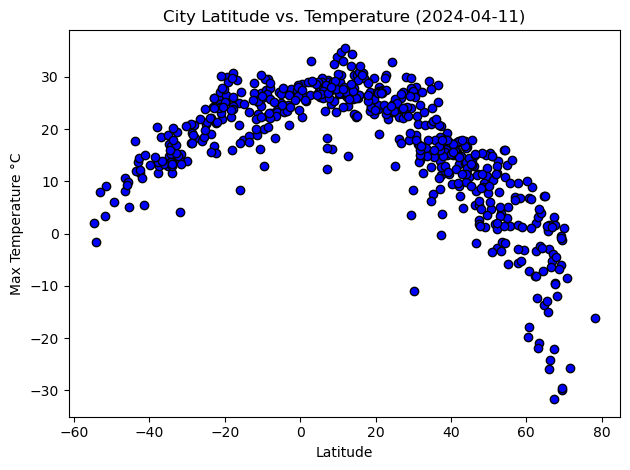

In [38]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature °C")
date=city_data_df['Date'].min()
plt.title(f"City Latitude vs. Temperature ({date})")
plt.tight_layout()

# Remove grid lines
plt.grid(False)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

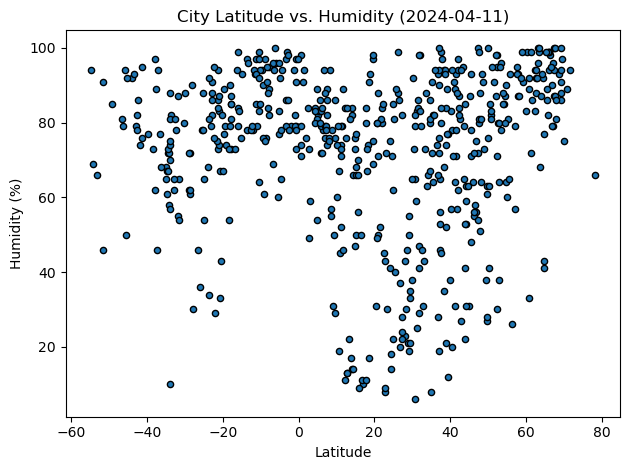

In [39]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', x='Lat', y='Humidity', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Humidity ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.tight_layout()

# Remove grid lines
plt.grid(False)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

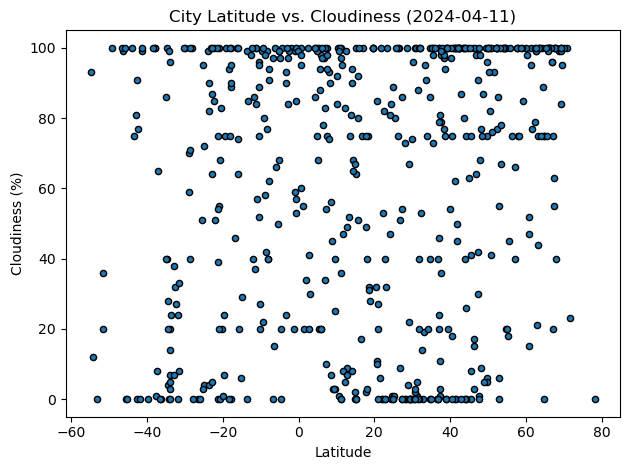

In [40]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Cloudiness ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.tight_layout()

# Remove grid lines
plt.grid(False)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

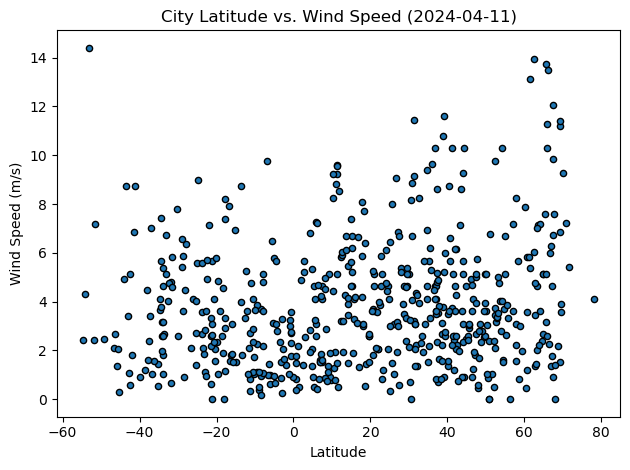

In [41]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Wind Speed ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.tight_layout()

# Remove grid lines
plt.grid(False)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mersa matruh,31.3525,27.2453,17.10,83,1,3.22,EG,2024-04-11
1,nyurba,63.2842,118.3319,-20.94,96,44,2.02,RU,2024-04-11
6,olonkinbyen,70.9221,-8.7187,-8.39,89,100,7.21,SJ,2024-04-11
8,fortuna,40.5982,-124.1573,14.96,78,75,5.66,US,2024-04-11
9,champerico,14.3000,-91.9167,30.28,66,68,3.44,GT,2024-04-11


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<= 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,paita,-5.0892,-81.1144,23.58,77,68,5.80,PE,2024-04-11
3,achacachi,-16.0500,-68.6833,8.32,84,64,3.07,BO,2024-04-11
4,marica,-22.9194,-42.8186,25.97,91,87,1.12,BR,2024-04-11
5,saint-pierre,-21.3393,55.4781,25.82,73,0,2.57,RE,2024-04-11
7,waitangi,-43.9535,-176.5597,17.68,92,100,4.92,NZ,2024-04-11


###  Temperature vs. Latitude Linear Regression Plot

Linear equation: y = -0.57x + 35.1
The r-value is: -0.8533681133463231


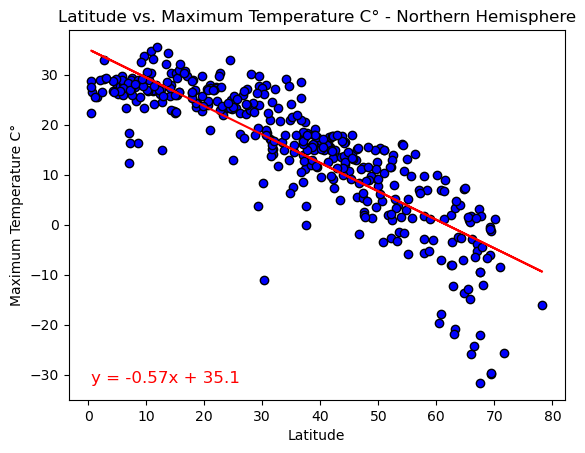

In [42]:
# Scatter plot
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs. Temperature in Northern Hemisphere")

# Define a function to create Linear Regression plots
def lr_funcV2(x, y, name, vbl, hemi):
    (slope, intercept, rvalue, pvalue, stderror) = linregress(x, y)
    reg_values = x * slope + intercept
    plt.plot(x, reg_values, color='r')
    plt.title(f'Latitude vs. {vbl} - {hemi}')
    plt.xlabel('Latitude')
    plt.ylabel(vbl)
    line_eq = f'y = {(round(slope, 2))}x + {(round(intercept, 2))}'
    print(f'Linear equation: {line_eq}')
    plt.text(x.min(), y.min(), line_eq, fontsize=12, color="red")  
    plt.savefig(f"output_data/LinearRegresion_{name}.png")  
    print(f'The r-value is: {rvalue}')

x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
name = 'NH_LatVsMaxTemp'
vbl = 'Maximum Temperature C°'
hemi = 'Northern Hemisphere'
lr_funcV2(x, y, name, vbl, hemi)

# Remove grid lines
plt.grid(False)

plt.show()


Linear equation: y = 0.38x + 28.55
The r-value is: 0.7912389649095317


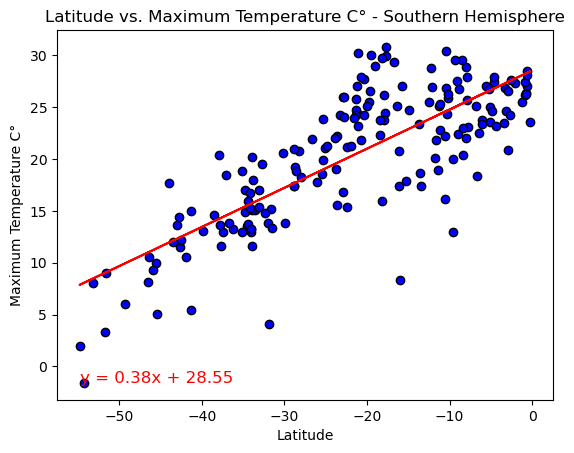

In [43]:
# Define a function to create Linear Regression plots
def lr_funcV2(x, y, name, vbl, hemi):
    (slope, intercept, rvalue, pvalue, stderror) = linregress(x, y)
    reg_values = x * slope + intercept
    plt.plot(x, reg_values, color='r')
    plt.title(f'Latitude vs. {vbl} - {hemi}')
    plt.xlabel('Latitude')
    plt.ylabel(vbl)
    line_eq = f'y = {(round(slope, 2))}x + {(round(intercept, 2))}'
    print(f'Linear equation: {line_eq}')
    plt.text(x.min(), y.min(), line_eq, fontsize=12, color="red")  
    plt.savefig(f"output_data/LinearRegresion_{name}.png") 
    print(f'The r-value is: {rvalue}')

# Scatter plot for Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs. Temperature in Southern Hemisphere")

x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
name = 'SH_LatVsMaxTemp'
vbl = 'Maximum Temperature C°'
hemi = 'Southern Hemisphere'
lr_funcV2(x, y, name, vbl, hemi)

# Remove grid lines
plt.grid(False)

plt.show()

**Discussion about the linear relationship:** 

There is a strong relationship between latitude and maximum temperature. A negative correlation is visible for the Northern Hemisphere and a positive correlation is visible in the Southern Hemisphere. It seems that Maximum Temperature increases as we approach the equator. 

### Humidity vs. Latitude Linear Regression Plot

Linear equation: y = 0.33x + 57.84
The r-value is: 0.265073122595054


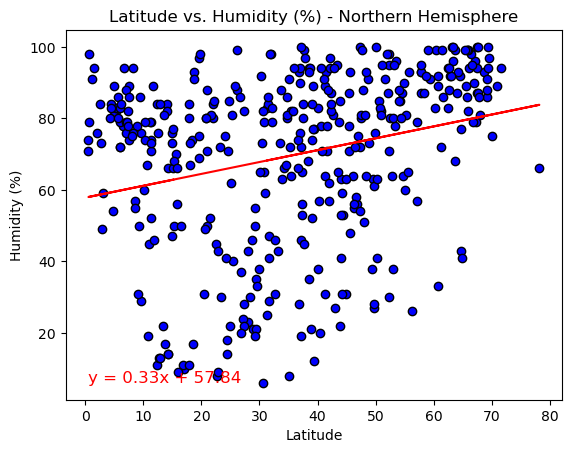

In [44]:
# Define a function to create Linear Regression plots
def lr_funcV2(x, y, name, vbl, hemi):
    (slope, intercept, rvalue, pvalue, stderror) = linregress(x, y)
    reg_values = x * slope + intercept
    plt.plot(x, reg_values, color='r')
    plt.title(f'Latitude vs. {vbl} - {hemi}')
    plt.xlabel('Latitude')
    plt.ylabel(vbl)
    line_eq = f'y = {(round(slope, 2))}x + {(round(intercept, 2))}'
    print(f'Linear equation: {line_eq}')
    plt.text(x.min(), y.min(), line_eq, fontsize=12, color="red")  
    plt.savefig(f"output_data/LinearRegresion_{name}.png") 
    print(f'The r-value is: {rvalue}')


# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Humidity'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
name = 'NH_LatVsHumidity'
vbl = 'Humidity (%)'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)

# Remove grid lines
plt.grid(False)

plt.show()

Linear equation: y = 0.33x + 85.6
The r-value is: 0.29661475296478806


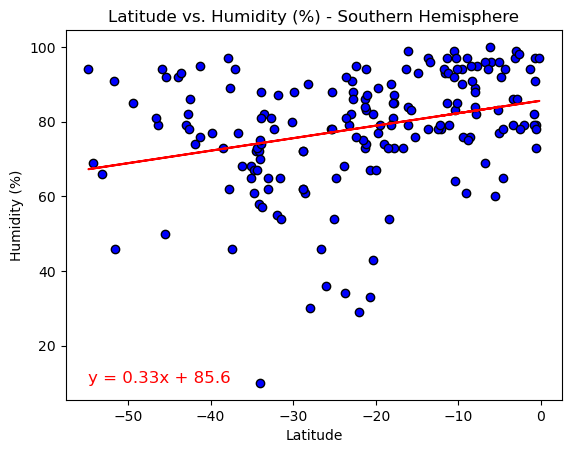

In [45]:
# Define a function to create Linear Regression plots
def lr_funcV2(x, y, name, vbl, hemi):
    (slope, intercept, rvalue, pvalue, stderror) = linregress(x, y)
    reg_values = x * slope + intercept
    plt.plot(x, reg_values, color='r')
    plt.title(f'Latitude vs. {vbl} - {hemi}')
    plt.xlabel('Latitude')
    plt.ylabel(vbl)
    line_eq = f'y = {(round(slope, 2))}x + {(round(intercept, 2))}'
    print(f'Linear equation: {line_eq}')
    plt.text(x.min(), y.min(), line_eq, fontsize=12, color="red")  
    plt.savefig(f"output_data/LinearRegresion_{name}.png") 
    print(f'The r-value is: {rvalue}')

# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Humidity'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
name = 'SH_LatVsHumidity'
vbl = 'Humidity (%)'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)

# Remove grid lines
plt.grid(False)

plt.show()

**Discussion about the linear relationship:** 

- There is little to no relationship between latitude and humidity based on the data. The linear equation for each hemisphere shows a slight positive correlation, which indiciates the proximity to the equator has no bearing on humidity. The scatter points show that the data is too spread out for there to be any reliable correlation between latitude and humidty. 

### Cloudiness vs. Latitude Linear Regression Plot

Linear equation: y = 0.41x + 47.54
The r-value is: 0.2030487333154322


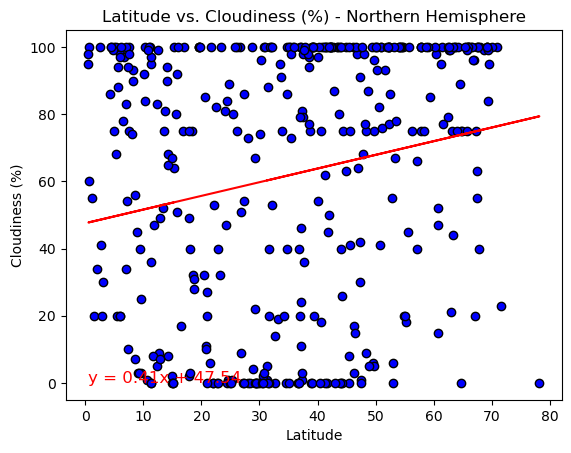

In [46]:
# Define a function to create Linear Regression plots
def lr_funcV2(x, y, name, vbl, hemi):
    (slope, intercept, rvalue, pvalue, stderror) = linregress(x, y)
    reg_values = x * slope + intercept
    plt.plot(x, reg_values, color='r')
    plt.title(f'Latitude vs. {vbl} - {hemi}')
    plt.xlabel('Latitude')
    plt.ylabel(vbl)
    line_eq = f'y = {(round(slope, 2))}x + {(round(intercept, 2))}'
    print(f'Linear equation: {line_eq}')
    plt.text(x.min(), y.min(), line_eq, fontsize=12, color="red")  
    plt.savefig(f"output_data/LinearRegresion_{name}.png") 
    print(f'The r-value is: {rvalue}')

# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
name = 'NH_LatVsCloudiness'
vbl = 'Cloudiness (%)'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)

# Remove grid lines
plt.grid(False)

plt.show()

Linear equation: y = 0.69x + 73.49
The r-value is: 0.24829043020571817


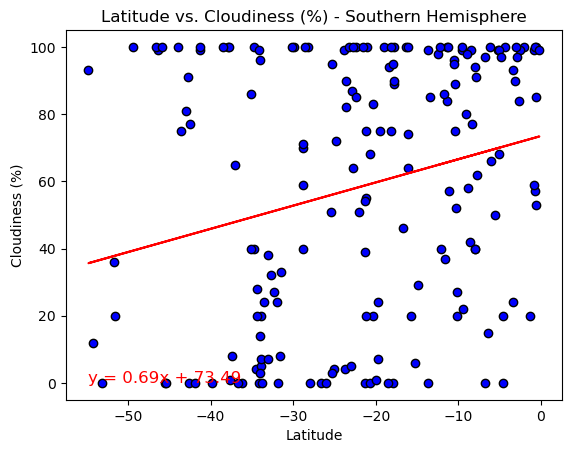

In [47]:
# Define a function to create Linear Regression plots
def lr_funcV2(x, y, name, vbl, hemi):
    (slope, intercept, rvalue, pvalue, stderror) = linregress(x, y)
    reg_values = x * slope + intercept
    plt.plot(x, reg_values, color='r')
    plt.title(f'Latitude vs. {vbl} - {hemi}')
    plt.xlabel('Latitude')
    plt.ylabel(vbl)
    line_eq = f'y = {(round(slope, 2))}x + {(round(intercept, 2))}'
    print(f'Linear equation: {line_eq}')
    plt.text(x.min(), y.min(), line_eq, fontsize=12, color="red")  
    plt.savefig(f"output_data/LinearRegresion_{name}.png") 
    print(f'The r-value is: {rvalue}')

# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
name = 'SH_LatVsCloudiness'
vbl = 'Cloudiness (%)'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)

# Remove grid lines
plt.grid(False)

plt.show()

**Discussion about the linear relationship:** 

- There is little to no relationship between latitude and cloudiness based on the data. The linear equation for each hemisphere shows a positive correlation, which indiciates the proximity to the equator has no bearing on cloudiness. The scatter points show that the data is too spread out for there to be any reliable correlation between latitude and cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

Linear equation: y = 0.02x + 3.36
The r-value is: 0.1501611009681329


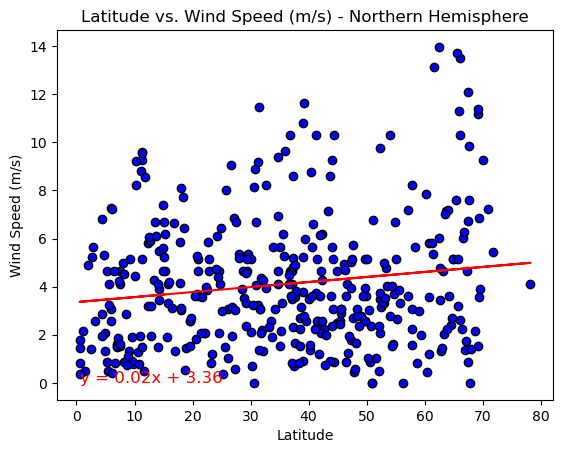

In [48]:
# Define a function to create Linear Regression plots
def lr_funcV2(x, y, name, vbl, hemi):
    (slope, intercept, rvalue, pvalue, stderror) = linregress(x, y)
    reg_values = x * slope + intercept
    plt.plot(x, reg_values, color='r')
    plt.title(f'Latitude vs. {vbl} - {hemi}')
    plt.xlabel('Latitude')
    plt.ylabel(vbl)
    line_eq = f'y = {(round(slope, 2))}x + {(round(intercept, 2))}'
    print(f'Linear equation: {line_eq}')
    plt.text(x.min(), y.min(), line_eq, fontsize=12, color="red")  
    plt.savefig(f"output_data/LinearRegresion_{name}.png") 
    print(f'The r-value is: {rvalue}')

# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
name = 'NH_LatVsWindSpeed'
vbl = 'Wind Speed (m/s)'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)

# Remove grid lines
plt.grid(False)

plt.show()

Linear equation: y = -0.04x + 2.42
The r-value is: -0.2300906885448517


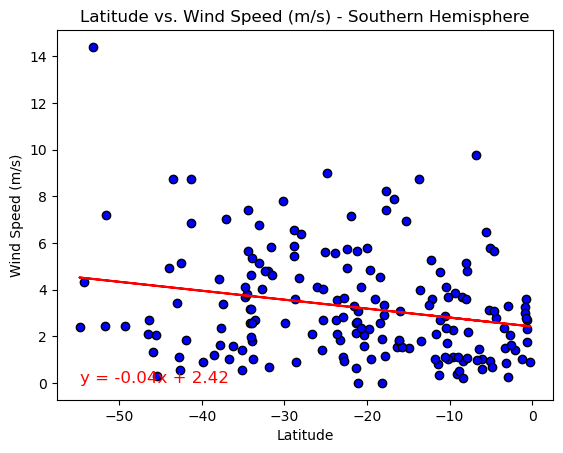

In [49]:
# Define a function to create Linear Regression plots
def lr_funcV2(x, y, name, vbl, hemi):
    (slope, intercept, rvalue, pvalue, stderror) = linregress(x, y)
    reg_values = x * slope + intercept
    plt.plot(x, reg_values, color='r')
    plt.title(f'Latitude vs. {vbl} - {hemi}')
    plt.xlabel('Latitude')
    plt.ylabel(vbl)
    line_eq = f'y = {(round(slope, 2))}x + {(round(intercept, 2))}'
    print(f'Linear equation: {line_eq}')
    plt.text(x.min(), y.min(), line_eq, fontsize=12, color="red")  
    plt.savefig(f"output_data/LinearRegresion_{name}.png") 
    print(f'The r-value is: {rvalue}')

# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
name = 'SH_LatVsWindSpeed'
vbl = 'Wind Speed (m/s)'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)

# Remove grid lines
plt.grid(False)

plt.show()

**Discussion about the linear relationship:** 

- There is little to no relationship between latitude and wind speed based on the data. The r value is low for both hemispheres and the scatter points show that the data is too spread for there to be any reliable correlation between latitude and wind speed.